In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [100]:
df_h5 = pd.read_hdf("./h5/AD00203.h5", "labels")

In [101]:
df_h5

,x
0,Oligodendrocytes
1,Oligodendrocytes
2,Oligodendrocytes
3,Oligodendrocytes
4,Oligodendrocytes
...,...
3765,Oligodendrocytes
3766,Oligodendrocytes
3767,Microglia
3768,Oligodendrocytes


In [3]:
df = pd.read_csv("./dataset_stats.csv")

In [4]:
df

,Name,Cells,Genes,Class no.,Class %
0,AD00203,3770,24694,6,70.16 12.33 8.86 2.07 3.82 2.76
1,AD00204,2303,10827,5,88.28 3.56 3.82 4.26 0.09
2,AD00205,19282,25817,6,1.86 12.22 26.94 11.78 39.86 7.34
3,AD00206,25537,26582,6,43.86 17.08 1.4 21.94 11.13 4.58
4,AD00303,2261,17442,2,89.16 10.84
5,AD00307,6675,17240,7,68.28 2.91 7.16 4.64 14.07 1.48 1.45
6,AD00308,4742,17222,7,17.23 65.25 6.98 2.38 2.47 4.07 1.62
7,AD00309,4708,17196,7,76.83 1.4 1.15 10.47 6.01 1.02 3.12
8,AD00401,8153,14136,4,97.33 1.68 0.69 0.31
9,AD00405,1697,14701,4,86.15 1.41 12.32 0.12


In [39]:
class_per = list(df["Class %"])
dnames = list(df["Name"])

In [40]:
dnames

['AD00203',
 'AD00204',
 'AD00205',
 'AD00206',
 'AD00303',
 'AD00307',
 'AD00308',
 'AD00309',
 'AD00401',
 'AD00405',
 'AD00501',
 'AD00601',
 'AD00602',
 'AD00603',
 'AD00604',
 'AD00702',
 'AD00703',
 'AD00704',
 'AD00705',
 'AD00714',
 'AD00715',
 'AD00716',
 'AD01002',
 'AD01004',
 'AD01104']

In [7]:
def text_to_list(atxt):
    return [round(float(i), 2) for i in atxt.split()]

In [14]:
lls = [text_to_list(i) for i in class_per]

In [18]:
for l in lls:
    l.sort(reverse=True)

In [22]:
max([len(i) for i in lls])

7

In [25]:
a = [1, 2, 3]
s = 5
b = [0 for i in range(s-len(a))]
a + b

[1, 2, 3, 0, 0]

In [50]:
def fix_lists_for_plt(lists):
    flist = [[round(float(i), 2) for i in txts.split()] for txts in lists]
    final = []
    for l in flist:
        l.sort(reverse=True)
    maxv = max([len(i) for i in lls])
    for l in flist:
        l = l + [0 for i in range(maxv-len(l))]
        final.append(l)
    names = [f"cell {i}" for i in range(maxv)]
    return final, names


In [51]:
for_stacked_bar, cell_names = fix_lists_for_plt(list(df["Class %"]))

In [60]:
for_stacked_bar
[round(sum(i), 1) for i in for_stacked_bar]

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [65]:
sbd = list(np.array(for_stacked_bar).T)
fds = {}
for i, nam in enumerate(cell_names):
    fds[nam] = sbd[i]
fds

{'cell 0': array([70.16, 88.28, 39.86, 43.86, 89.16, 68.28, 65.25, 76.83, 97.33,
        86.15, 95.54, 86.58, 94.16, 80.54, 92.35, 94.91, 70.54, 90.75,
        91.45, 76.16, 80.73, 78.34, 94.73, 95.62, 98.14]),
 'cell 1': array([12.33,  4.26, 26.94, 21.94, 10.84, 14.07, 17.23, 10.47,  1.68,
        12.32,  4.46, 13.42,  5.84, 19.46,  7.65,  5.09, 15.04,  9.25,
         8.55, 14.42,  8.94, 10.68,  5.27,  4.38,  1.04]),
 'cell 2': array([ 8.86,  3.82, 12.22, 17.08,  0.  ,  7.16,  6.98,  6.01,  0.69,
         1.41,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  7.65,  0.  ,
         0.  ,  6.3 ,  6.72,  7.2 ,  0.  ,  0.  ,  0.82]),
 'cell 3': array([ 3.82,  3.56, 11.78, 11.13,  0.  ,  4.64,  4.07,  3.12,  0.31,
         0.12,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  4.97,  0.  ,
         0.  ,  3.11,  3.6 ,  3.78,  0.  ,  0.  ,  0.  ]),
 'cell 4': array([2.76, 0.09, 7.34, 4.58, 0.  , 2.91, 2.47, 1.4 , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.81, 0.  , 0.  , 0.  , 0.  , 0.  

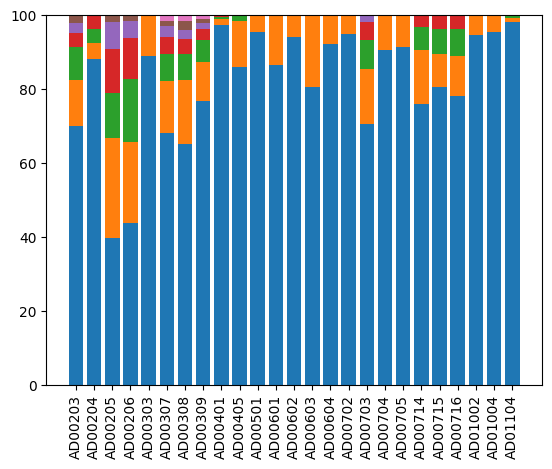

In [96]:
fig, ax = plt.subplots()
bottom = np.zeros(25)
for cellname, cel_vals in fds.items():
    p = ax.bar(dnames, cel_vals, label=cellname, bottom=bottom)
    bottom += cel_vals
plt.xticks(rotation = 90)
# ax.legend(loc="upper right")


plt.show()

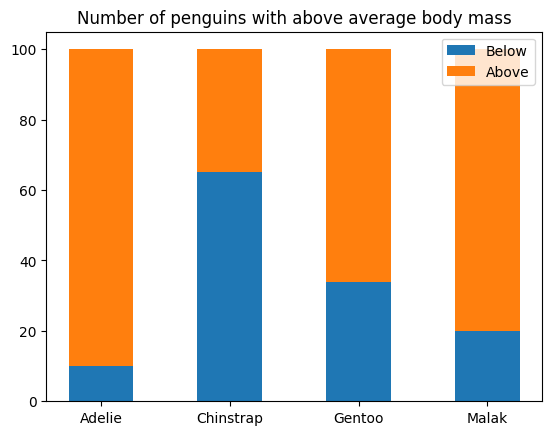

In [94]:
species = (
    "Adelie",
    "Chinstrap",
    "Gentoo",
    "Malak",
)
weight_counts = {
    "Below": np.array([10, 65, 34, 20]),
    "Above": np.array([90, 35, 66, 80]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

In [76]:
dfsbd = pd.DataFrame(sbd)
dfsbd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,70.16,88.28,39.86,43.86,89.16,68.28,65.25,76.83,97.33,86.15,...,94.91,70.54,90.75,91.45,76.16,80.73,78.34,94.73,95.62,98.14
1,12.33,4.26,26.94,21.94,10.84,14.07,17.23,10.47,1.68,12.32,...,5.09,15.04,9.25,8.55,14.42,8.94,10.68,5.27,4.38,1.04
2,8.86,3.82,12.22,17.08,0.00,7.16,6.98,6.01,0.69,1.41,...,0.00,7.65,0.00,0.00,6.30,6.72,7.20,0.00,0.00,0.82
3,3.82,3.56,11.78,11.13,0.00,4.64,4.07,3.12,0.31,0.12,...,0.00,4.97,0.00,0.00,3.11,3.60,3.78,0.00,0.00,0.00
4,2.76,0.09,7.34,4.58,0.00,2.91,2.47,1.40,0.00,0.00,...,0.00,1.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2.07,0.00,1.86,1.40,0.00,1.48,2.38,1.15,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,1.45,1.62,1.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
